
<h1 id="IPBMA_3:-Phantom-Simulation">IPBMA_3: Phantom Simulation<a class="anchor-link" href="#IPBMA_3:-Phantom-Simulation">¶</a></h1>



<p>Author: Pablo G Tahoces</p>


In [6]:


import numpy as np
from matplotlib import pyplot
from utils.utils import get_coef

SOURCE_PATH = 'C:\\Users\\ulloa\\Miooooo\\Master\\IPBMA\\IPBMANotebooks\\IPBMI_Notebooks\\E3\\auxFiles'
def breast_phantom(edge_size, energy):
    breast_coef = get_coef(3,energy,SOURCE_PATH)
    air_coef = get_coef(1,energy,SOURCE_PATH)
    soft_coef = get_coef(4,energy,SOURCE_PATH)
    adipose_coef = get_coef(0,energy,SOURCE_PATH)


    cell_size = edge_size//18
    frame = np.full((edge_size, edge_size, edge_size), air_coef)
    mid_point = edge_size//2

    # putting breast adipose 
    frame[mid_point - 4*cell_size: mid_point + 3*cell_size,
          mid_point - 3*cell_size: mid_point + 4*cell_size,
          mid_point - 6*cell_size: mid_point + 3*cell_size] = adipose_coef
      
    # putting breast tissue 
    frame[mid_point - 2*cell_size: mid_point + cell_size,
          mid_point - cell_size: mid_point + 2*cell_size,
          mid_point - 5*cell_size: mid_point - 2*cell_size] = breast_coef
    
    # putting soft tissue
    frame[mid_point - cell_size: mid_point,
          mid_point: mid_point + cell_size,
          mid_point - 4*cell_size: mid_point - 3*cell_size] = soft_coef

    # putting right most square
    frame[mid_point - 2*cell_size: mid_point + cell_size,
          mid_point - cell_size: mid_point + 2*cell_size,
          mid_point + 3*cell_size: mid_point + 6*cell_size] = adipose_coef
      
    # putting second soft tissue
    frame[mid_point - cell_size: mid_point,
          mid_point: mid_point + cell_size,
          mid_point - cell_size: mid_point] = soft_coef

    # putting third soft tissue
    frame[mid_point - cell_size: mid_point,
          mid_point: mid_point + cell_size,
          mid_point + 4*cell_size: mid_point + 5*cell_size] = soft_coef


    return frame

In [7]:


# %run ..\\..\\auxFiles\\phantomsFnc.py
# %run ..\\..\\auxFiles\\IOFnc.py


<p>Building Breast Phantom</p>


In [8]:


edge_size = 256     # Size of each cube edge
energy = 40         # Energy of the incident photons
p = breast_phantom(edge_size, energy)


<p>Display of the phantom, from left to right.</p>


In [9]:


slice_1 = p[:, 128, :]

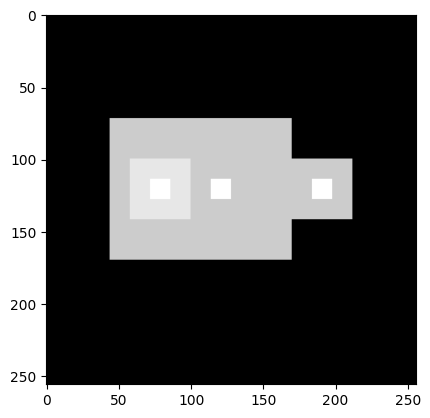

In [10]:


pyplot.imshow(slice_1, cmap="gray")
pyplot.show()


<p>Plot of pixel values across the phantom, from left to right.</p>


In [70]:


nLine = 128
line = getLine(slice_1, nLine)
pyplot.plot(line)

NameError: name 'getLine' is not defined


<p>Display of the phantom, from back to front.</p>


In [ ]:


slice_2 = p[:, :, 70]

In [ ]:


pyplot.imshow(slice_2, cmap="gray")
pyplot.show()

In [ ]:


nLine = 128
line = getLine(slice_2, nLine)
pyplot.plot(line)


<p>Remaining phantoms, similar procedure.....</p>



<p>Building Homogeneus Cube Phantom (Cube_Phantom_h)</p>



<p>................</p>



<p>Building Non-Homogeneus Cube Phantom (Cube_Phantom_nh)</p>



<p>...............</p>
